## Running pygame tutorial.ipynb のコピー / google

###Install pygame

In [ ]:
!pip install pygame

###Dependencies

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time
import os, sys

###Fool system to think it has a video access

In [ ]:
# set SDL to use the dummy NULL video driver,
#   so it doesn't need a windowing system.
os.environ["SDL_VIDEODRIVER"] = "dummy"

### Simple Pygame example

In [ ]:
import pygame

pygame.init()
screen = pygame.display.set_mode((400, 300))
done = False
is_blue = True
x = 30
y = 30

while not done:
        for event in pygame.event.get():
                if event.type == pygame.QUIT:
                        done = True

        color = (255, 100, 0)
        pygame.draw.rect(screen, color, pygame.Rect(x, y, 60, 60))

        pygame.display.flip()

        #convert image so it can be displayed in OpenCV
        view = pygame.surfarray.array3d(screen)

        #  convert from (width, height, channel) to (height, width, channel)
        view = view.transpose([1, 0, 2])

        #  convert from rgb to bgr
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

        #Display image, clear cell every 0.5 seconds
        cv2_imshow(img_bgr)
        time.sleep(0.5)
        output.clear()


In [ ]:
import pygame

pygame.init()
screen = pygame.display.set_mode((400, 300))
done = False
is_blue = True
x = 30
y = 30

count = 0
while count<250:
        count += 1
        for event in pygame.event.get():
                if event.type == pygame.QUIT:
                        done = True

        color = (255, 100, count)
        pygame.draw.rect(screen, color, pygame.Rect(x, y, 60, 60))

        pygame.display.flip()

        #convert image so it can be displayed in OpenCV
        view = pygame.surfarray.array3d(screen)

        #  convert from (width, height, channel) to (height, width, channel)
        view = view.transpose([1, 0, 2])

        #  convert from rgb to bgr
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

        #Display image, clear cell every 0.5 seconds
        output.clear()
        cv2_imshow(img_bgr)
        time.sleep(0.2)
        #output.clear()

###TODO

1. Add a button to break the while loop.

## pygame + colab notebook cell --> display image

In [ ]:
#@title draw image / PIL

from PIL import Image, ImageDraw
from IPython.display import display
import time
from google.colab import output


count = 0
while count<250:
  # draw image
  im = Image.new("RGB", (400,300))
  draw = ImageDraw.Draw(im)
  draw.ellipse((20+count,100,120+count,200),fill=(255,count,0))
  # clear output (to draw image at the same position)
  output.clear(True)
  # display drawed image
  display(im)
  time.sleep(0.2)
  count += 2
#end

In [ ]:
#@title pygame + colab notebook --> moving box

#
# pygame + colab notebook  -->  moving box
#

import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time
import os, sys

# set SDL to use the dummy NULL video driver,
#   so it doesn't need a windowing system.
os.environ["SDL_VIDEODRIVER"] = "dummy"

import pygame

pygame.init()
screen = pygame.display.set_mode((400, 300))
done = False
is_blue = True
x = 30
y = 30

count = 0
while count<250:
        count += 1

        # clear screen
        pygame.draw.rect(screen, (0,0,0), pygame.Rect(0, 0, 400, 300))

        color = (255, 100, count)
        pygame.draw.rect(screen, color, pygame.Rect(x+count, y, 60, 60))

        pygame.display.flip()

        #convert image so it can be displayed in OpenCV
        view = pygame.surfarray.array3d(screen)

        #  convert from (width, height, channel) to (height, width, channel)
        view = view.transpose([1, 0, 2])

        #  convert from rgb to bgr
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

        # reset output position and clear?
        output.clear(True)

        #Display image, clear cell every 0.5 seconds
        cv2_imshow(img_bgr)

        time.sleep(0.1)



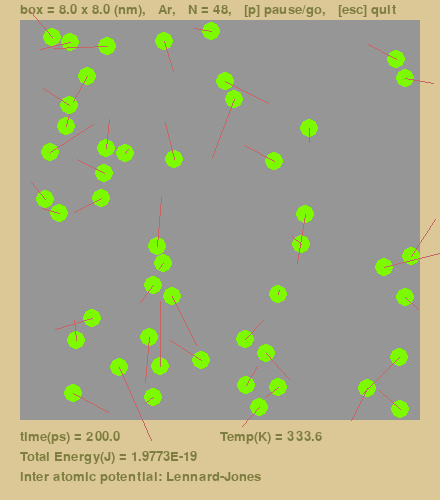

In [4]:
#@title py001_ArMD2D


#-----------------------------------------------------------------------------------
#
#  py001_ArMD2D
#    Copyright(C) 2021 Mitsuru Ikeuchi
#    Released under the MIT license ( https://opensource.org/licenses/MIT )
#
#    ver 0.0.0  2021.11.16 created, last updated on 2021.11.23
#
#--------------------  molecular dynamics 2D ----------------------------------------
#
#    time evolution: velocity Verlet Algorithm
#      (1) vi = vi + (Fi/mi)*(0.5dt)
#      (2) ri = ri + vi*dt
#      (3) calculation Fi <- {r1,r2,...,rn} Fi=sum(Fij,j=1 to n,j!=i), Fij=F(ri-rj)
#      (4) vi = vi + (Fi/mi)*(0.5dt)
#      goto (1)
#
#    potential: Lennard-Jones V(r) = 4.0*epsilon*((sigma/r)^12-(sigma/r)^6)
#    force: F(r) = -dV(r)/dr = 24.0*epsilon*r6*(2.0*r6-1.0)/r, r6=(sigma/r)^6
#
#-----------------------------------------------------------------------------------

import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time
import os, sys

# set SDL to use the dummy NULL video driver,
#   so it doesn't need a windowing system.
os.environ["SDL_VIDEODRIVER"] = "dummy"

import pygame
from pygame.locals import *
import math, random
pygame.display.set_mode ( (640,480))

pygame.init()
pygame.display.set_caption("py001 Ar molecular dynamics 2D")

#-------------  set global  --------------------------------------------------------

gc_AMU = 1.66053904e-27             # (kg) atomic mass unit
gc_kB = 1.380649e-23                # (J/K) Boltzmann's constant
gc_nMax = 100                       # max list length of particles

g_N = 48                            # number of particles
g_sysTime = 0.0                     # (s) system time
g_timeStep = 10.0e-15               # (s) time step dt
g_xMax = 8.0E-9                     # (m) x-size of real box
g_yMax = 8.0E-9                     # (m) y-size of real box
g_kineticEnergy = 0.0               # (J) total kinetic energy
g_potentialEnergy = 0.0             # (J) total potential energy

# lists of particles
g_px = [ 0.0 for i in range(gc_nMax) ]   # x-component of position of particle i
g_py = [ 0.0 for i in range(gc_nMax) ]   # y-component of position of particle i
g_vx = [ 0.0 for i in range(gc_nMax) ]   # x-component of velocity of particle i
g_vy = [ 0.0 for i in range(gc_nMax) ]   # y-component of velocity of particle i
g_fx = [ 0.0 for i in range(gc_nMax) ]   # x-component of force of particle i
g_fy = [ 0.0 for i in range(gc_nMax) ]   # y-component of force of particle i

# #check 'i is global? in [ 0.0 for i in range(gc_nMax) ]'
# a = [ 0.0 for i in range(10) ]
# print('i=',i)
# -->  NameError: name 'i' is not defined

# material data:  Lennard-Jones V(r) = 4.0*epsilon*((sigma/r)^12-(sigma/r)^6)
g_mass = 39.95*gc_AMU               # (kg) mass of Ar
g_sigma = 3.418e-10                 # (m) Lennard-Jones potential sigma for Ar
g_epsilon = 1.711e-21               # (J) Lennard-Jones potential epsilon for Ar

# screen surface
g_screenSize = (g_width,g_height) = (440, 500)
g_screen = pygame.display.set_mode(g_screenSize)
g_backgroundColor = (220,200,150)

# box
g_boxPos = (g_xBoxPos,g_yBoxPos) = (20,20)
g_boxSize = (g_boxWidth,g_boxHeight) = (400,400)
g_boxRect = (g_xBoxPos, g_yBoxPos, g_boxWidth, g_boxHeight)
g_boxColor = (150, 150, 150)

# text
g_font = pygame.font.Font(None, 20) # font size 20
g_textColor = (125, 125, 63)

g_particleColor= (125,250,0)
g_velocityColor = (200,100,100)

g_inkey = 0
g_pauseFlag = 0 # pauseFlag 0:evolve, 1:pause


#-------------  define function  ---------------------------------------------------

def systemTemperature():
	ek = 0.0
	for i in range(g_N):
		ek += 0.5*g_mass*(g_vx[i]*g_vx[i]+g_vy[i]*g_vy[i])
	return ek/(g_N*gc_kB) # for 2D

def ajustVelocity(temp):
	a = math.sqrt(temp/systemTemperature())
	for i in range(g_N):
		g_vx[i] = a*g_vx[i]
		g_vy[i] = a*g_vy[i]


#------------  set initial condition  ----------------------------------------------

# normal distributed random number: -3.0 <= normalRandom3() < 3.0
def normalRandom3():
	return random.random()+random.random()+random.random()+random.random()+random.random()+random.random()-3.0

def setParticlePosition(nn):
	nRow = math.ceil(math.sqrt(nn-0.5))
	ax = g_xMax/(nRow+1)
	ay = g_yMax/(nRow+1)
	for i in range(nn):
		nx = i%nRow
		ny = int(i/nRow)
		g_px[i] = ax*(nx+1)
		g_py[i] = ay*(ny+1)

def setInitialCondition(temp):
	global g_inkey, g_pauseFlag, g_sysTime

	g_inkey = 0
	g_pauseFlag = 0
	g_sysTime = 0.0

	setParticlePosition(g_N)

	# set particle velocity and force
	for i in range(g_N):
		g_vx[i] = 600.0*normalRandom3()
		g_vy[i] = 600.0*normalRandom3()
		g_fx[i] = 0.0
		g_fy[i] = 0.0

	ajustVelocity(temp)


#-------------  time evolution  ----------------------------------------------------

# boundary:L-J type; epsilon = 0.5*epsilonOfAr, sigma = sigmaOfAr
def boundaryForce(r):
	global g_potentialEnergy
	ri = (g_sigma/r)
	r6 = ri*ri*ri*ri*ri*ri
	g_potentialEnergy += 4.0*0.5*g_epsilon*r6*(r6-1.0)
	return (24.0*0.5*g_epsilon*r6*(2.0*r6-1.0)/r)

def calcForce():
	global g_potentialEnergy

	g_potentialEnergy = 0.0
	s05 = 0.5*g_sigma
	for i in range(g_N):
		g_fx[i] = 0.0
		g_fy[i] = 0.0
	i = 0
	while i < g_N:
		j = i+1
		while j < g_N:
			xij=g_px[i]-g_px[j]
			yij=g_py[i]-g_py[j]
			r = math.sqrt(xij*xij+yij*yij)
			# calc. L-J force and potential
			ri = (g_sigma/r)
			r6 =ri*ri*ri*ri*ri*ri
			# V(r) = 4.0*epsilon*((sigma/r)^12-(sigma/r)^6)
			g_potentialEnergy += 4.0*g_epsilon*r6*(r6-1.0)
			# F(r) = 24.0*epsilon*r6*(2.0*r6-1.0)/r, r6=(sigma/r)^6
			f = 24.0*g_epsilon*r6*(2.0*r6-1.0)/r

			fxij = f*xij/r
			fyij = f*yij/r
			g_fx[i] += fxij
			g_fy[i] += fyij
			g_fx[j] -= fxij
			g_fy[j] -= fyij
			j += 1
		i += 1
	for i in range(g_N):
		g_fx[i] += boundaryForce(g_px[i]+s05) + boundaryForce(g_px[i]-g_xMax-s05)
		g_fy[i] += boundaryForce(g_py[i]+s05) + boundaryForce(g_py[i]-g_yMax-s05)

# velocity Verlet
def moveParticles(dt):
	global g_kineticEnergy

	a = 0.5*dt/g_mass
	for i in range(g_N):
		g_vx[i] += a*g_fx[i]
		g_vy[i] += a*g_fy[i]
		g_px[i] += g_vx[i]*dt
		g_py[i] += g_vy[i]*dt
	calcForce()
	for i in range(g_N):
		g_vx[i] += a*g_fx[i]
		g_vy[i] += a*g_fy[i]
	g_kineticEnergy = 0.0
	for i in range(g_N):
		g_kineticEnergy += 0.5*g_mass*(g_vx[i]*g_vx[i]+g_vy[i]*g_vy[i])

def timeEvolution(nCalc,dt):
	global g_sysTime

	for i in range(nCalc):
		g_sysTime += dt
		moveParticles(dt)


#-------------  draw  --------------------------------------------------------------

def drawText(txt,x,y):
	# render(text, antialias, color, background=None) -> Surface
	text = g_font.render(txt, 1, g_textColor)
	# blit(source, dest, area=None, special_flags=0) -> Rect
	g_screen.blit(text, (x,y))

def drawParticles():
	sc = g_boxWidth/g_xMax
	xPos = g_xBoxPos
	yPos = g_yBoxPos
	ir = int(0.5*g_sigma*sc+0.5)
	for i in range(g_N):
		ix = int(g_px[i]*sc+0.5)+xPos
		iy = int(g_py[i]*sc+0.5)+yPos
		# circle(surface, color, center, radius) -> Rect
		pygame.draw.circle(g_screen, g_particleColor, [ix, iy], ir)

def drawParticleVelocity(vMag):
	#vMag: velocity line length = v*dt*vMag
	sc = g_boxWidth/g_xMax
	xPos = g_xBoxPos
	yPos = g_yBoxPos
	for i in range(g_N):
		ix = int(g_px[i]*sc+0.5)+xPos
		iy = int(g_py[i]*sc+0.5)+yPos
		ix2 = ix + int(g_vx[i]*g_timeStep*sc*vMag)
		iy2 = iy + int(g_vy[i]*g_timeStep*sc*vMag)
		# line(surface, color, start_pos, end_pos, width) -> Rect
		pygame.draw.line(g_screen,g_velocityColor,[ix, iy],[ix2, iy2], 1)

def drawScreen():
	# clear screen
	g_screen.fill(g_backgroundColor)

	# draw box
	# rect(surface, color, rect) -> Rect
	# draw rect outline: rect(surface, color, rect, width, ... ) -> Rect
	pygame.draw.rect(g_screen, g_boxColor, g_boxRect)

	# draw caption
	yOffset = g_yBoxPos + g_boxHeight + 10
	drawText('box = %s x %s (nm),   Ar,   N = %d,   [p] pause/go,   [esc] quit' % \
				( str(round(g_xMax*1.0e9,1)), str(round(g_yMax*1.0e9,1)), g_N ), 20, 3)
	drawText('time(ps) = '+str(round(g_sysTime*1.0e12,1)),20,yOffset)
	drawText('Temp(K) = '+str(round(systemTemperature(),1)), 220, yOffset)
	drawText('Total Energy(J) = '+str(round((g_kineticEnergy+g_potentialEnergy)*1.0e19,4))+'E-19', 20, yOffset+20)
	drawText('inter atomic potential: Lennard-Jones', 20, yOffset+40)

	# draw particles
	drawParticles()

	# draw velocity line
	drawParticleVelocity(200.0) #drawParticleVelocity(vMag)

	# Update the full display Surface to the screen: flip() -> None
	pygame.display.flip()


#-------------  main  --------------------------------------------------------------

# set particles  setInitialCondition(temp)
setInitialCondition(300.0)

count = 0
while count<1000:
  if g_pauseFlag==0:
    # timeEvolution(nCalc, dt)
    timeEvolution(20,g_timeStep)

  drawScreen()

  #convert image so it can be displayed in OpenCV
  view = pygame.surfarray.array3d(g_screen)
  #  convert from (width, height, channel) to (height, width, channel)
  view = view.transpose([1, 0, 2])
  #  convert from rgb to bgr
  img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
  # reset output position and clear?
  output.clear(True)
  #Display image, clear cell every 0.5 seconds
  cv2_imshow(img_bgr)

  time.sleep(0.05)
  count += 1
# end



## js001_ArMD2D / %%html

In [ ]:
#@title js001_ArMD2D / %%html

%%html

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8">
<title>js001_ArMD2D</title>
<script type="text/javascript">

// %%%%%%%%%%%%%%%%%%%%  javaScript  %%%%%%%%%%%%%%%%%%%%

'use strict';

/* --------------------
//
//  js001_ArMD2D
//    Copyright(C) 2017-2023 Mitsuru Ikeuchi
//    Released under the MIT license ( https://opensource.org/licenses/MIT )
//
//    ver 0.0.0  2017.04.25 created, last updated on 2018.11.10
//    ver 0.0.1  2019.01.06 v1, last updated on 2021.04.20
//    ver 0.0.2  2021.10.27 v2, last updated on 2021.10.27
//    ver 0.0.3  2023.02.11 v3, last updated on 2023.08.11
//
// --------------------  molecular dynamics 2D
//
//    time evolution: velocity Verlet Algorithm
//      (1) vi = vi + (Fi/mi)*(0.5dt)
//      (2) ri = ri + vi*dt
//      (3) calculation Fi <- {r1,r2,...,rn} Fi=sum(Fij,j=1 to n,j!=i), Fij=F(ri-rj)
//      (4) vi = vi + (Fi/mi)*(0.5dt)
//      goto (1)
//
//    potential: Lennard-Jones V(r) = 4.0*epsilon*((sigma/r)^12-(sigma/r)^6)
//    force: F(r) = -dV(r)/dr = 24.0*epsilon*r6*(2.0*r6-1.0)/r, r6=(sigma/r)^6
//
// --------------------
*/

const ArMD2D = (function(){ // ====================  ArMD2D Module  ====================

	const g_AMU = 1.66053904e-27;			// (kg) atomic mass unit
	const g_kB = 1.380649e-23;				// (J/K) Boltzmann's constant
	const g_nMax = 500;						// array max

	let g_nParticles = 300;					// number of particles
	let g_sysTime = 0.0;					// (s) system time
	let g_timeStep = 5.0e-15;				// (s) time step dt
	let g_xMax = 8.0E-9;					// (m) x-box size
	let g_yMax = 8.0E-9;					// (m) y-box size
	let g_kineticEnergy = 0.0;				// (J) total kinetic energy
	let g_potentialEnergy = 0.0;			// (J) total potential energy

	const g_xx = dim1( g_nMax );			// (m) x-component of i-th particle position
	const g_yy = dim1( g_nMax );			// (m) y-component of i-th particle position
	const g_vx = dim1( g_nMax );			// (m/s) x-component of i-th particle velocity
	const g_vy = dim1( g_nMax );			// (m/s) y-component of i-th particle velocity
	const g_ffx = dim1( g_nMax );			// (N) x-component of total force applied i-th particle
	const g_ffy = dim1( g_nMax );			// (N) y-component of total force applied i-th particle

	function dim1( n ) {
		return new Float64Array( n );
	}

	// ---  material data

	const g_mass = 39.95*g_AMU;			// (kg) mass of Ar
	const g_sigma = 3.418e-10;			// (m) Lennard-Jones potential sigma for Ar
	const g_epsilon = 1.711e-21;		// (J) Lennard-Jones potential epsilon for Ar


	// --------------------  set initial condition  --------------------

	function setInitialCondition( nn, BoxSizeInNM, contTemp ) {

		g_sysTime = 0.0;
		g_nParticles = nn;
		g_xMax = BoxSizeInNM*1.0e-9;
		g_yMax = BoxSizeInNM*1.0e-9;
		g_nParticles = setParticles( nn );
		ajustVelocity(contTemp);
	}

	function setParticles( nn ) {
		const sigma = g_sigma;
		let nParticles = nn;

		for ( let j=0; j<nn; j++ ) {
			let loopCount = 0;
			let i;
			do {
				g_xx[j] = (g_xMax-1.2*sigma)*Math.random() + 0.6*sigma;
				g_yy[j] = (g_yMax-1.2*sigma)*Math.random() + 0.6*sigma;
				for ( i=0; i<j; i++ ) {
					if ((g_xx[i]-g_xx[j])*(g_xx[i]-g_xx[j])+(g_yy[i]-g_yy[j])*(g_yy[i]-g_yy[j]) < 1.4*sigma*sigma) break;
				}
				loopCount = loopCount + 1
				if (loopCount>1000) break;
			} while (i<j);
			if (loopCount>1000) {
				nParticles = j - 1;
				break;
			}
		}
		for ( let i=0; i<nParticles; i++ ) {
			g_vx[i] = 200.0*normalRandom3();
			g_vy[i] = 200.0*normalRandom3();
			g_ffx[i] = 0.0;
			g_ffy[i] = 0.0;
		}
		return nParticles;
	}

	// normal distributed random number: -3.0 <= normalRandom3() < 3.0
	function normalRandom3() {
		return (Math.random()+Math.random()+Math.random()+Math.random()+Math.random()+Math.random()-3.0);
	}


	// --------------------  time evolution  --------------------

	function timeEvolution( nCalc ) {
		for (let i=0; i<nCalc; i++) {
			g_sysTime += g_timeStep;
			moveParticles(g_timeStep);
		}
	}

	function moveParticles( dt ) {
		const nn=g_nParticles;
		let a = 0.5*dt/g_mass;
		for (let i=0; i<nn; i++) {
			g_vx[i] += a*g_ffx[i];
			g_vy[i] += a*g_ffy[i];
			g_xx[i] += g_vx[i]*dt;
			g_yy[i] += g_vy[i]*dt;
		}
		calcForce();
		for (let i=0; i<nn; i++) {
			g_vx[i] += a*g_ffx[i];
			g_vy[i] += a*g_ffy[i];
		}
		g_kineticEnergy = 0.0;
		for (let i=0; i<nn; i++) {
			g_kineticEnergy += 0.5*g_mass*(g_vx[i]*g_vx[i]+g_vy[i]*g_vy[i]);
		}
	}

	function calcForce() {
		const nn = g_nParticles, sgm = g_sigma, eps = g_epsilon;
		const s05 = 0.5*g_sigma;

		g_potentialEnergy = 0.0;
		for (let i=0; i<nn; i++) {
			g_ffx[i]=0; g_ffy[i]=0;
		}
		for (let i=0; i<nn; i++) {
			for (let j=i+1; j<nn; j++) {
				const xij=g_xx[i]-g_xx[j];
				const yij=g_yy[i]-g_yy[j];
				const r = Math.sqrt(xij*xij+yij*yij);
				// calc. L-J force and potential
				const ri = sgm/r;
				const r6 = ri*ri*ri*ri*ri*ri;
				// V(r) = 4.0*epsilon*((sigma/r)^12-(sigma/r)^6)
				g_potentialEnergy += 4.0*eps*r6*(r6-1.0);
				// F(r) = 24.0*epsilon*r6*(2.0*r6-1.0)/r, r6=(sigma/r)^6
				const f = 24.0*eps*r6*(2.0*r6-1.0)/r;

				const fxij = f*xij/r;
				const fyij = f*yij/r;
				g_ffx[i] += fxij;
				g_ffy[i] += fyij;
				g_ffx[j] -= fxij;
				g_ffy[j] -= fyij;
			}
		}
		for (let i=0; i<nn; i++) {
			g_ffx[i] += boundaryForce(g_xx[i]+s05) + boundaryForce(g_xx[i]-g_xMax-s05);
			g_ffy[i] += boundaryForce(g_yy[i]+s05) + boundaryForce(g_yy[i]-g_yMax-s05);
		}
	}

	function boundaryForce(r) { // boundary:L-J type; epsilon = 0.5*epsilonOfAr, sigma = sigmaOfAr
		const ri = (g_sigma/r);
		const r6 = ri*ri*ri*ri*ri*ri;
		g_potentialEnergy += 4.0*0.5*g_epsilon*r6*(r6-1.0);
		return (24.0*0.5*g_epsilon*r6*(2.0*r6-1.0)/r);
	}


	// --------------------  utility  --------------------

	function systemTemperature() {
		const nn=g_nParticles;
		let ek= 0.0; // kinetic energy (J)
		for (let i=0; i<nn; i++) {
			ek = ek + 0.5*g_mass*(g_vx[i]*g_vx[i]+g_vy[i]*g_vy[i]);
		}
		return ek/(nn*g_kB); // for 2D
	}

	function ajustVelocity(temp) {
		const nn = g_nParticles;
		const a = Math.sqrt(temp/systemTemperature());
		for (let i=0; i<nn; i++) {
			g_vx[i] = a*g_vx[i];
			g_vy[i] = a*g_vy[i];
		}
	}


	// --------------------  public  --------------------

	return {
		init:			setInitialCondition,	// setInitialCondition( nn, BoxSizeInNM, contTemp )
		evolve:			timeEvolution,			// timeEvolution( nCalc )

		setTemp:		ajustVelocity,			// ajustVelocity( contTemp )

		getSysParam:	function() { return [ g_nParticles, g_timeStep, g_xMax, g_yMax ]; },
		getNow:			function() { return [ g_sysTime, systemTemperature(), g_kineticEnergy, g_potentialEnergy ]; },
		getArData:		function() { return [ g_mass, g_sigma, g_epsilon, 'Ar' ]; },

		getPosition:	function(i) { return [ g_xx[i], g_yy[i] ]; },
		getVelocity:	function(i) { return [ g_vx[i], g_vy[i] ]; },
		getForce:		function(i) { return [ g_ffx[i], g_ffy[i] ]; },
	};

})(); // ====================  ArMD2D Module end  ====================


const js001 = (function(){ // ====================  js Module  ====================

	const theModule = ArMD2D;
	const xCanvasSize = 480;	// in pixel
	const yCanvasSize = 480;	// in pixel
	let canvas;
	let ctx;

	let v_nn = 100;
	let v_BoxSizeInNM = 8.0;
	let v_tempMode = 0;			// 0: adiabatic, 1: temp.control
	let v_contTemp = 300.0;

	let p_nParticles, p_timeStep, p_xMax, p_yMax; // = theModule.getSysParam();

	let dispMode = 0;			// no use
	let resetFlag = true;
	let pauseFlag = false;
	let breakFlag = false;

	function main() {
		resetFlag = true;
		setCanvas( 'canvas_box', xCanvasSize, yCanvasSize );

		animate();

		function setCanvas( canvasID, width, height ) {
			canvas = document.getElementById( canvasID );
			canvas.width  = width;
			canvas.height = height;
			ctx = canvas.getContext('2d');
			ctx.font = "16px 'sans-serif'";
			ctx.textBaseline = "bottom";
			ctx.textAlign = "left";
			ctx.lineWidth = 1;
		}
	}


	function animate() {
    if ( breakFlag ) return;

		if ( resetFlag ) {
			resetFlag = false;
			theModule.init( v_nn, v_BoxSizeInNM, v_contTemp ); // ( nn, BoxSizeInNM, contTemp )
			[ p_nParticles, p_timeStep, p_xMax, p_yMax ] = theModule.getSysParam();
		}

		if ( !pauseFlag ) {
			const nCalc = 40;
			theModule.evolve( nCalc );
		}

		draw( ctx, dispMode );

		requestAnimationFrame(animate);
	}


	// --------------------  draw  --------------------

	const molecColor = '#b4ff00';

	function draw( ctx, dispMode ) {
		const xp = 40, yp = 5, xBoxSize = 400, yBoxSize = 400, yTextPos = yCanvasSize-45;

		ctx.clearRect( 0, 0, xCanvasSize, yCanvasSize );

		// draw box
		ctx.strokeStyle = "#888800";
		ctx.strokeRect( xp, yp, xBoxSize, yBoxSize );

		// draw ball
		drawBalls( ctx, xp, yp, xBoxSize/p_xMax );

		// caption
		let sysTime, temperature, kineticEnergy, potentialEnergy;
		[ sysTime, temperature, kineticEnergy, potentialEnergy ] = theModule.getNow();
		const energy = kineticEnergy+potentialEnergy;

		ctx.fillStyle = "#888888";
		ctx.fillText( `time = ${(sysTime*1.0e12).toFixed(1)} (ps)`, xp, yTextPos );
		ctx.fillText( `Temp = ${temperature.toFixed(1)} (K)`, xp+200, yTextPos );
		ctx.fillText( `molec: Ar, N = ${p_nParticles}`, xp, yTextPos+20 );
		ctx.fillText( `energy = ${energy.toExponential(4)} (J)`, xp+200, yTextPos+20 );
		ctx.fillText( `Box = ${(p_xMax*1.0e9).toFixed(1)+"x"+(p_yMax*1.0e9).toFixed(1)} (nm)`, xp, yTextPos+40 );
		//document.getElementById("text_caption").innerHTML = "minimum molecular dynamics code"
	}

	function drawBalls( ctx, xp, yp, scale ) {
		const yMax = p_yMax, nn = p_nParticles, twoPi = 2.0*Math.PI;
		const r = 0.5*theModule.getArData()[1]; // r = 0.5*sigma of Ar

		ctx.fillStyle = molecColor;
		for (let i=0; i<nn; i++) {
			ctx.beginPath();
			let x, y;
			[ x, y ] = ArMD2D.getPosition(i);
			ctx.arc(x*scale+xp, (yMax-y)*scale+yp, r*scale, 0, twoPi, false);
			ctx.fill();
		}
	}


	// --------------------  control  --------------------

	function pause() {
		pauseFlag = ( pauseFlag==false );
	}

	function breakLoop() {
		breakFlag = true;
	}


	// --------------------  public  --------------------

	return {
		main:			main,			// main()

		pause:			pause,			// pause();
    breakLoop:	breakLoop,	// breakLoop();
	};

})(); // ====================  js001 module end  ====================


// event
const js = js001;
js.main();


// %%%%%%%%%%%%%%%%%%%%  end of javaScript  %%%%%%%%%%%%%%%%%%%%

</script>

<style type="text/css">
    body { text-align:left; color:#000000; background-color:#fff8dd; }
</style>

</head>

<body>
<p>[js001] Ar in the Box (Molecular Dynamics 2D)</p>
<canvas ID="canvas_box" style="background-color: #000000;" width="480" height="480"></canvas><br>

<button onClick="js.pause()">pause/go</button><br>

<p id="text_caption" ></p>
<hr width="480" align="left" color="#a0a0a0">
<button onClick="js.breakLoop()">animation break to END</button><br>

</body>
</html>
